In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('diabetes.csv')
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

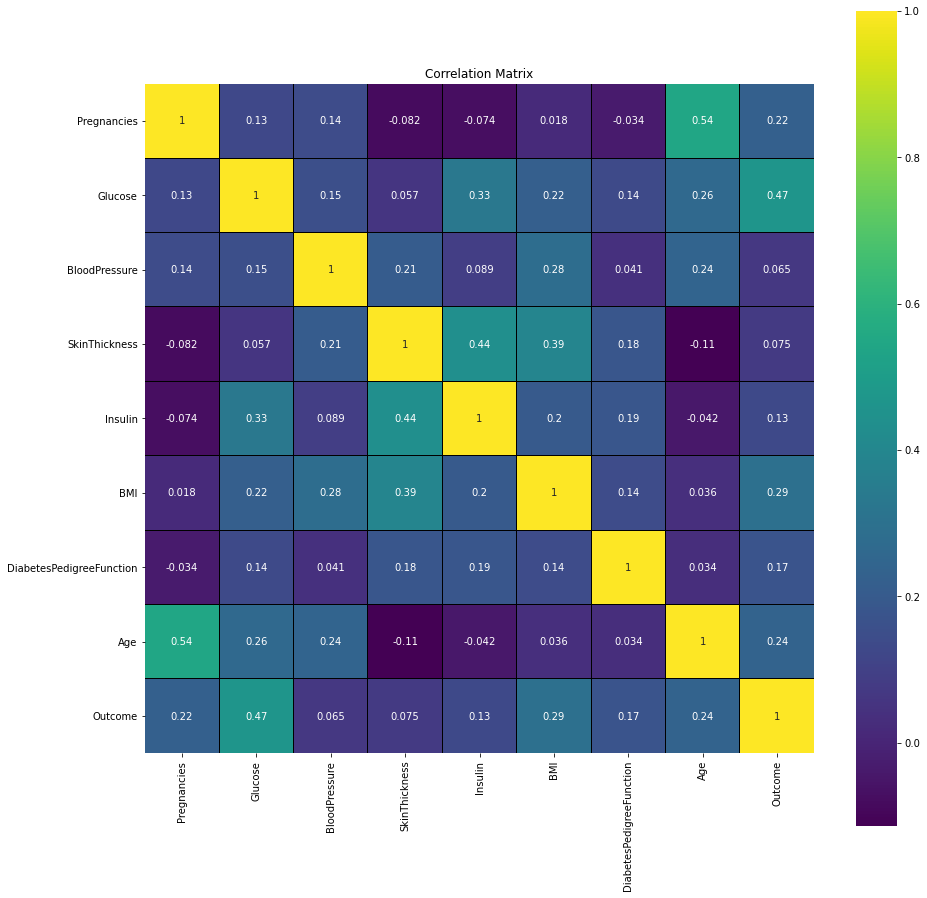

In [4]:
import seaborn as sns

colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title("Correlation Matrix")
sns.heatmap(data.corr(), cmap=colormap, annot=True, linewidths=0.1, vmax=1.0, 
            square=True, linecolor='black')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Outcome'], data['Outcome'], stratify=data['Outcome'], random_state=11)

In [10]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {: .2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {: .2f}".format(svc.score(X_test, y_test)))

Accuracy on training set:  0.77
Accuracy on test set:  0.76


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [12]:
svc = SVC()
svc.fit(scaled_X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(scaled_X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_X_test, y_test)))

Accuracy on training set: 0.80
Accuracy on test set: 0.78


In [13]:
svc = SVC(C=1000)
svc.fit(scaled_X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(scaled_X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_X_test, y_test)))

Accuracy on training set: 0.95
Accuracy on test set: 0.70


In [19]:
svc = SVC(C=500)
svc.fit(scaled_X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(scaled_X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.73


In [14]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [
                {'kernel':['rbf', 'linear', 'poly', 'sigmoid'],
                'C':[10,100,200,300,400,500,600,700,800,900,1000] 
                }
            ]

In [22]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count() )

In [24]:
grid_search.best_estimator_

SVC(C=10, kernel='linear')

In [25]:
grid_search.best_score_

0.7744706594071386